In [131]:
import glob
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [132]:
use_one_csv = True
fmod = "_t100"
one_csv_path = "../results/vary_sigma" + fmod + ".csv"
multi_csv_paths = "../results/"

In [133]:
if use_one_csv: # if loading from one csv
    df = pd.read_csv(one_csv_path)
else: # if loading from multiple csvs
    df: pd.DataFrame = pd.DataFrame()
    found_files = []
    for file in glob.glob(multi_csv_paths + "vary_sigma_*.csv"):
        found_files.append(file) 
        df_it = pd.read_csv(file)
        df = df.append(df_it)

In [134]:
df.head()

,dataset,explainer,n_trees,max_depth,facet_sd,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_manhattan,avg_length,prep_time,explain_time,sample_time,n_explain
0,adult,FACETIndex,100,NaN,0.3,0,0.844666,0.705550,0.622676,0.661527,1.0,0.380202,0.619439,3.65,48.249096,5.392013,0.269601,20
1,credit,FACETIndex,100,NaN,0.3,0,0.798143,0.833269,0.926935,0.877609,1.0,0.388576,0.711939,6.00,48.034644,1.796052,0.089803,20
2,compas,FACETIndex,100,NaN,0.3,0,0.630682,0.586433,0.571429,0.578834,1.0,0.182500,0.182500,1.00,23.482632,0.362999,0.018150,20
3,adult,FACETIndex,100,NaN,0.4,0,0.844666,0.705550,0.622676,0.661527,1.0,0.733895,1.268836,4.30,48.951708,2.904921,0.145246,20
4,credit,FACETIndex,100,NaN,0.4,0,0.798143,0.833269,0.926935,0.877609,1.0,0.450733,0.834770,6.40,46.030842,2.356999,0.117850,20


In [135]:
print("files: {}".format(found_files))
found_ds = list(df["dataset"].unique())
found_sigmas = list(df["facet_sd"].unique())
found_sigmas.sort()
print("datasets: {}".format(found_ds))
print("sigmas: {}".format(found_sigmas))

files: ['../results\\vary_sigma_it0.csv', '../results\\vary_sigma_it1.csv', '../results\\vary_sigma_it2.csv', '../results\\vary_sigma_it3.csv', '../results\\vary_sigma_it4.csv', '../results\\vary_sigma_it5.csv', '../results\\vary_sigma_it6.csv', '../results\\vary_sigma_it7.csv', '../results\\vary_sigma_it8.csv', '../results\\vary_sigma_it9.csv']
datasets: ['adult', 'credit', 'compas']
sigmas: [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]


In [136]:
df = df.groupby(["dataset", "explainer", "facet_sd"]).mean()
df.head(20)

n_trees  max_depth  iteration  accuracy  \
dataset explainer  facet_sd                                            
adult   FACETIndex 0.001       100.0        NaN        0.0  0.844666   
                   0.005       100.0        NaN        0.0  0.844666   
                   0.010       100.0        NaN        0.0  0.844666   
                   0.050       100.0        NaN        0.0  0.844666   
                   0.100       100.0        NaN        0.0  0.844666   
                   0.200       100.0        NaN        0.0  0.844666   
                   0.300       100.0        NaN        0.0  0.844666   
                   0.400       100.0        NaN        0.0  0.844666   
compas  FACETIndex 0.001       100.0        NaN        0.0  0.630682   
                   0.005       100.0        NaN        0.0  0.630682   
                   0.010       100.0        NaN        0.0  0.630682   
                   0.050       100.0        NaN        0.0  0.630682   
                   0.100       100.0        NaN        0.0  0.630682   
                   0.200       100.0        NaN        0.0  0.630682   
                   0.300       100.0        NaN        0.0  0.630682   
                   0.400       100.0        NaN        0.0  0.630682   
credit  FACETIndex 0.001       100.0        NaN        0.0  0.798143   
                   0.005       100.0        NaN        0.0  0.798143   
                   0.010       100.0        NaN        0.0  0.798143   
                   0.050       100.0        NaN        0.0  0.798143   

                             precision    recall        f1  per_valid  \
dataset explainer  facet_sd                                             
adult   FACETIndex 0.001      0.705550  0.622676  0.661527        1.0   
                   0.005      0.705550  0.622676  0.661527        1.0   
                   0.010      0.705550  0.622676  0.661527        1.0   
                   0.050      0.705550  0.622676  0.661527        1.0   
                   0.100      0.705550  0.622676  0.661527        1.0   
                   0.200      0.705550  0.622676  0.661527        1.0   
                   0.300      0.705550  0.622676  0.661527        1.0   
                   0.400      0.705550  0.622676  0.661527        1.0   
compas  FACETIndex 0.001      0.586433  0.571429  0.578834        1.0   
                   0.005      0.586433  0.571429  0.578834        1.0   
                   0.010      0.586433  0.571429  0.578834        1.0   
                   0.050      0.586433  0.571429  0.578834        1.0   
                   0.100      0.586433  0.571429  0.578834        1.0   
                   0.200      0.586433  0.571429  0.578834        1.0   
                   0.300      0.586433  0.571429  0.578834        1.0   
                   0.400      0.586433  0.571429  0.578834        1.0   
credit  FACETIndex 0.001      0.833269  0.926935  0.877609        1.0   
                   0.005      0.833269  0.926935  0.877609        1.0   
                   0.010      0.833269  0.926935  0.877609        1.0   
                   0.050      0.833269  0.926935  0.877609        1.0   

                             avg_dist  avg_manhattan  avg_length  prep_time  \
dataset explainer  facet_sd                                                   
adult   FACETIndex 0.001     0.567331       0.882162        2.95  57.338707   
                   0.005     0.631824       1.016167        3.45  56.815272   
                   0.010     0.581547       0.955591        3.45  56.852108   
                   0.050     0.324489       0.516162        3.15  56.785932   
                   0.100     0.206112       0.322299        2.85  52.640617   
                   0.200     0.281471       0.438399        2.90  51.135550   
                   0.300     0.380202       0.619439        3.65  48.249096   
                   0.400     0.733895       1.268836        4.30  48.951708   
compas  FACETIndex 0.001     0.182500       0.1

In [137]:
found_sigmas

[0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]

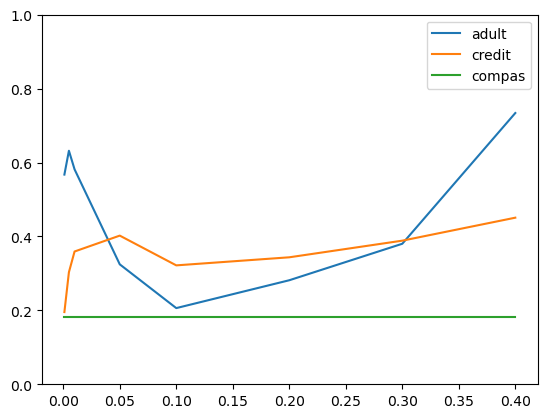

In [138]:
plt.figure()
for ds in found_ds:
    f1s = list(df.loc[ds, "FACETIndex", found_sigmas]["avg_dist"])
    plt.plot(found_sigmas, f1s)
plt.legend(found_ds)
plt.ylim([0, 1])
plt.savefig("vary_sigma" + fmod + ".png")
plt.show()